In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv("output10Moon.csv")

In [14]:
df2 = df.iloc[:,:2]
df2.head()
df2.rename(columns={'pc12':'param','pc21':'vals'}, inplace=True)
df2.head()

,param,vals
0,pc12,0.45
1,pc21,0.17
2,relaxation,0.07
3,Fnoise,0.09
4,scale,0.57


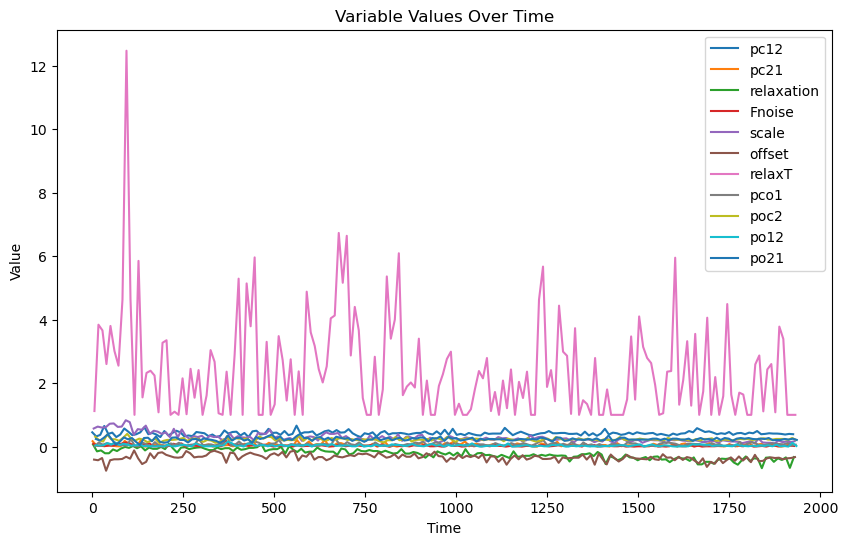

In [15]:
plt.figure(figsize=(10, 6))

# Loop through each unique variable and plot its values
for variable in df2['param'].unique():
    subset = df2[df2['param'] == variable]
    plt.plot(subset['vals'], label=variable)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Variable Values Over Time')
plt.legend()
plt.show()


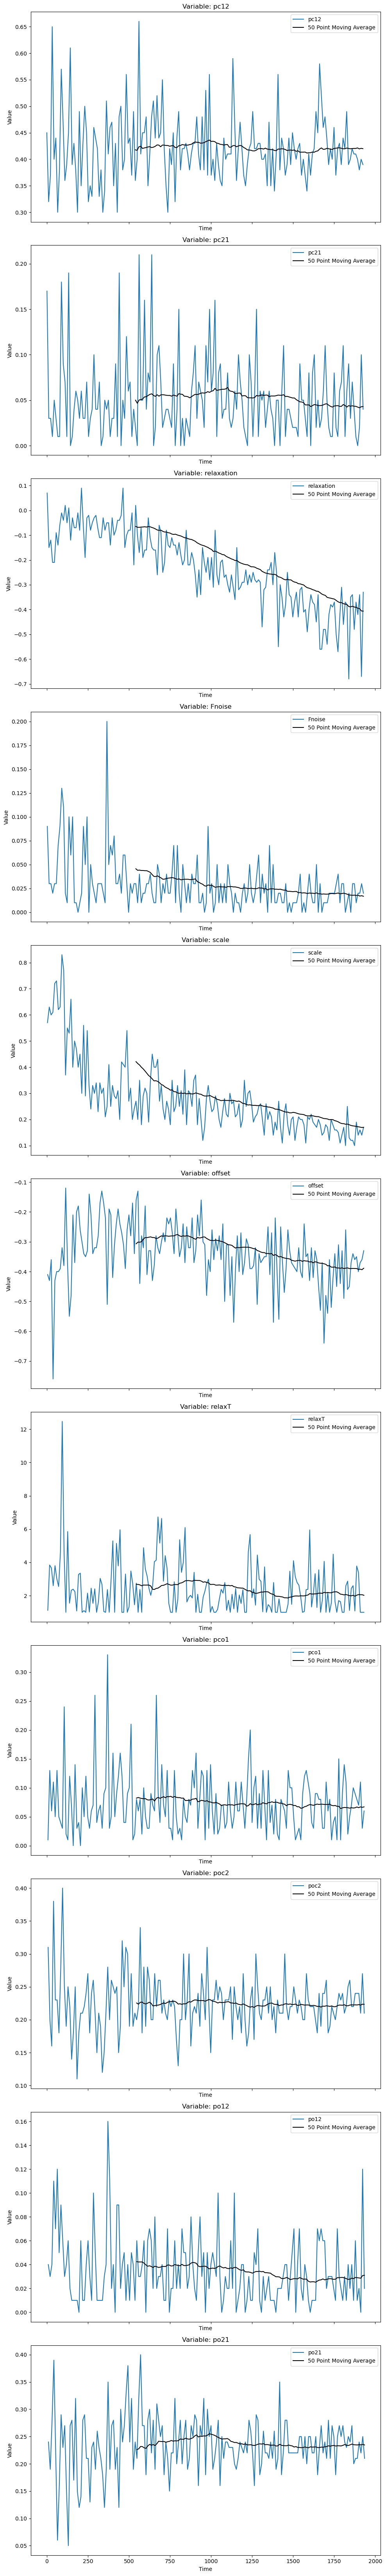

In [16]:

# Get unique variables
unique_vars = df2['param'].unique()
num_vars = len(unique_vars)
dist = 50
# Create subplots
fig, axes = plt.subplots(num_vars, 1, figsize=(10, 6 * num_vars), sharex=True)

# Loop through each unique variable and plot its values with a smooth black line showing the 10-point moving average
for i, variable in enumerate(unique_vars):
    subset = df2[df2['param'] == variable]
    axes[i].plot(subset['vals'], label=variable)
    # Calculate and plot the moving average
    moving_avg = subset['vals'].rolling(window=dist).mean()
    axes[i].plot(moving_avg, color='black', label=f'{dist} Point Moving Average')
    axes[i].set_title(f'Variable: {variable}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [17]:
subset

,param,vals
10,po21,0.24
21,po21,0.19
32,po21,0.28
43,po21,0.39
54,po21,0.22
...,...,...
1891,po21,0.21
1902,po21,0.24
1913,po21,0.22
1924,po21,0.25
